In [18]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
df=pd.read_csv('./nyc_weather.csv')
df.head()

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333


In [20]:
# Check any value is null
df.isnull().values.any()

True

In [21]:
df.isnull().sum().sum()

25

In [22]:
X=df[['Temperature']].values
y_true=df[['Humidity']].values

In [39]:
X.size
y_true.size


31

In [23]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [26]:
model.fit(X,y_true, epochs=40)

Epoch 1/40
31/31 [==============================] - 0s 5ms/step - loss: 10815.6738
Epoch 2/40
31/31 [==============================] - 0s 41us/step - loss: 5637.2095
Epoch 3/40
31/31 [==============================] - 0s 95us/step - loss: 2217.6714
Epoch 4/40
31/31 [==============================] - 0s 64us/step - loss: 576.2914
Epoch 5/40
31/31 [==============================] - 0s 76us/step - loss: 145.9025
Epoch 6/40
31/31 [==============================] - 0s 74us/step - loss: 699.2688
Epoch 7/40
31/31 [==============================] - 0s 57us/step - loss: 1608.8533
Epoch 8/40
31/31 [==============================] - 0s 101us/step - loss: 2304.7893
Epoch 9/40
31/31 [==============================] - 0s 52us/step - loss: 2549.1060
Epoch 10/40
31/31 [==============================] - 0s 56us/step - loss: 2332.1572
Epoch 11/40
31/31 [==============================] - 0s 56us/step - loss: 1810.6094
Epoch 12/40
31/31 [==============================] - 0s 73us/step - loss: 1183.7483
Epo

In [27]:
y_pred=model.predict(X)

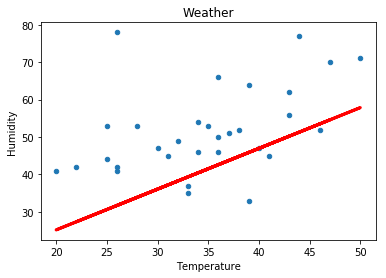

In [28]:
df.plot(kind='scatter',
       x='Temperature',
       y='Humidity', title='Weather')
plt.plot(X, y_pred, color='red', linewidth=3)

In [29]:
w,b=model.get_weights()

In [30]:
b.mean()


3.37237